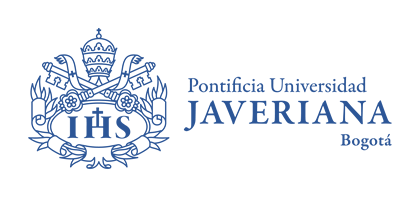

# Análisis de algoritmos - Ejemplo análisis regresión
## Uso de statsmodels para análisis de resultados
Este notebook tiene como objetivo familiarizar al estudiante con el uso del paquete statsmodels de Python para el análisis de resultados experimentales


In [8]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Carga de los archivos

Mediante el uso de la librería pandas, podemos cargar un archivo en formato 'csv' que generamos mediante nuestros experimentos.

In [4]:
df_results = pd.read_csv("data.res", sep=',', header=None, names=['n','bubble','insertion','quick'])

In [5]:
df_results.head()

,n,bubble,insertion,quick
0,1,1500,800,700
1,11,13800,6600,19500
2,21,37100,12400,25100
3,31,84600,20500,36600
4,41,132000,36800,52500


 Con la función plot, podemos revisar el comportamiento del tiempo de ejecución a medida que incrementamos el tamaño de la entrada

<Axes: xlabel='n'>

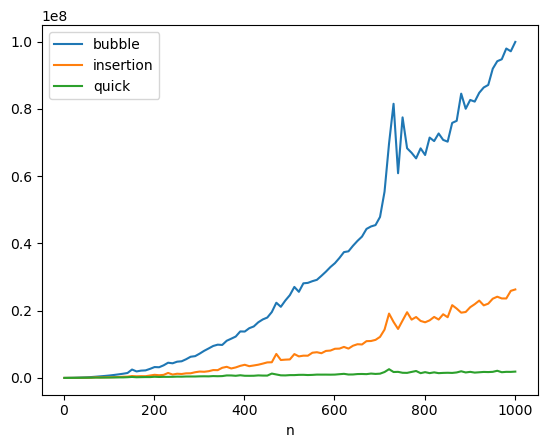

In [6]:
df_results.plot(y=['bubble','insertion','quick'],x='n')

# statsmodels API

Statsmodels es un paquete de estadística de Python que nos permite realizar de forma sencilla regresiones y confirmar si nuestra hipótesis teórica sobre el comportamiento de un algoritmo coincide con lo que estamos observando experimentalmente.

La función [`ols`](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html) realiza una regresión de mínimos cuadrados para ver si nuestra variable dependiente (n) se relaciona con la variable independiente (tiempo).

En nuestro DataFrame quedó registrado el tiempo del algoritmo `bubblesort` en la columna `bubble` del algoritmo. Nuestra hipótesis teórica es que este algoritmo es cuadrático, para realizar la confirmación de esta hipótesis vamos a relacionar ambas variables con la siguiente fórmula:

`bubble ~ np.power(n,2)`

Nota: Para ver la sintaxis de cómo se pueden expresar estas fórmulas, puede conocer más en el siguiente link:

https://www.statsmodels.org/devel/example_formulas.html


In [5]:
# ver https://www.statsmodels.org/devel/example_formulas.html

In [9]:
mod = smf.ols(formula='bubble ~ np.power(n,2)', data=df_results)

In [10]:
res = mod.fit()

In [11]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 bubble   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     5327.
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           6.80e-88
Time:                        12:51:36   Log-Likelihood:                -1686.3
No. Observations:                 101   AIC:                             3377.
Df Residuals:                      99   BIC:                             3382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.166e+06   6.48e+05     -1.

Los parámetros nos indican la relación encontrada entre las variables

In [12]:
res.params


Intercept        -1.165792e+06
np.power(n, 2)    1.047832e+02
dtype: float64

El plot_fit nos indica qué tanto ajuste logró la regresión vs los valores reales. Diferencias importantes para n pequeños o n grandes nos indicarían que no se está ajustando de forma correcta a la hipótesis.

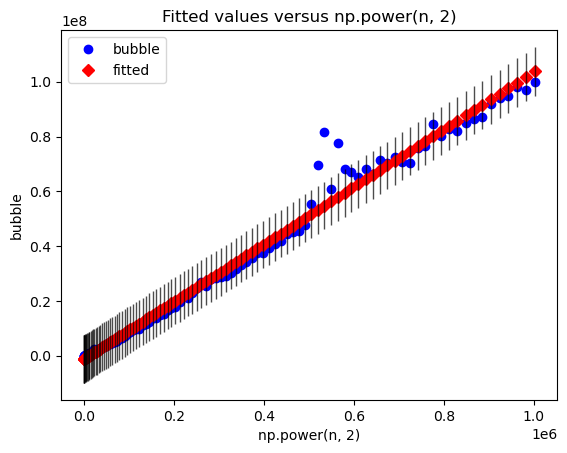

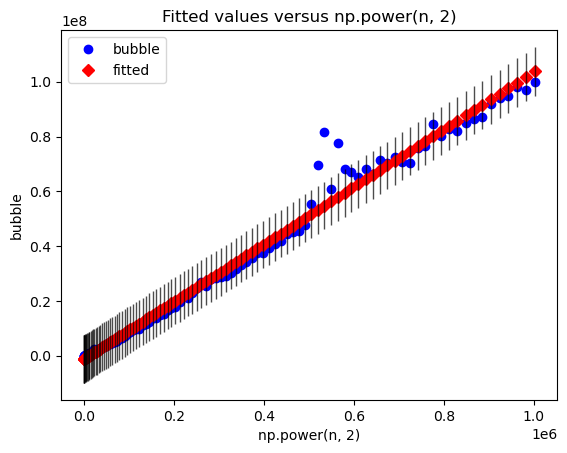

In [13]:
sm.graphics.plot_fit(res,"np.power(n, 2)")

El siguiente código prueba el resultado de la hipótesis de la complejidad teórica del quicksort vs lo obtenido.

In [14]:
mod = smf.ols(formula='quick ~ n:np.log2(n)', data=df_results)

In [15]:
res = mod.fit()

In [16]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  quick   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     1028.
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           4.33e-54
Time:                        12:54:44   Log-Likelihood:                -1368.4
No. Observations:                 101   AIC:                             2741.
Df Residuals:                      99   BIC:                             2746.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1951.7139   3.45e+04     -0.057   

In [17]:
res.params

Intercept      -1951.713900
n:np.log2(n)     200.553447
dtype: float64

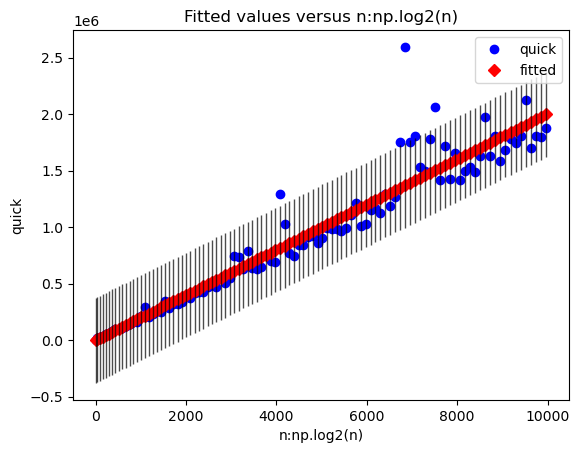

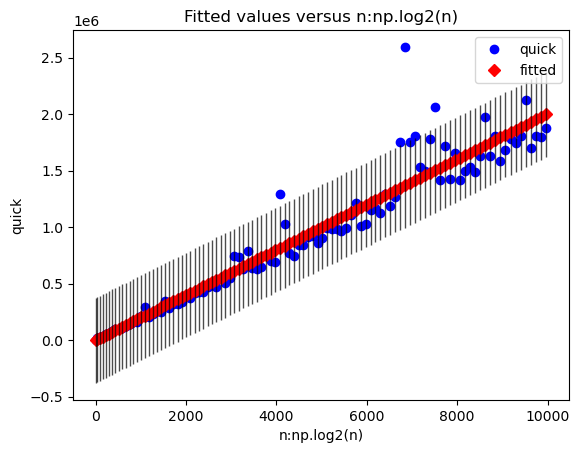

In [18]:
sm.graphics.plot_fit(res, "n:np.log2(n)")

In [19]:
mod = smf.ols(formula='insertion ~ np.power(n,2)', data=df_results)

In [20]:
res = mod.fit()

In [21]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              insertion   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     5600.
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           5.99e-89
Time:                        12:55:00   Log-Likelihood:                -1545.7
No. Observations:                 101   AIC:                             3095.
Df Residuals:                      99   BIC:                             3101.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.749e+05   1.61e+05     -2.

In [22]:
res.params

Intercept        -374904.634738
np.power(n, 2)        26.714465
dtype: float64

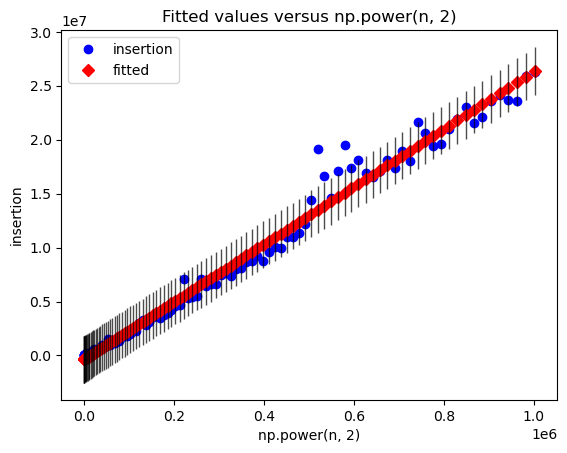

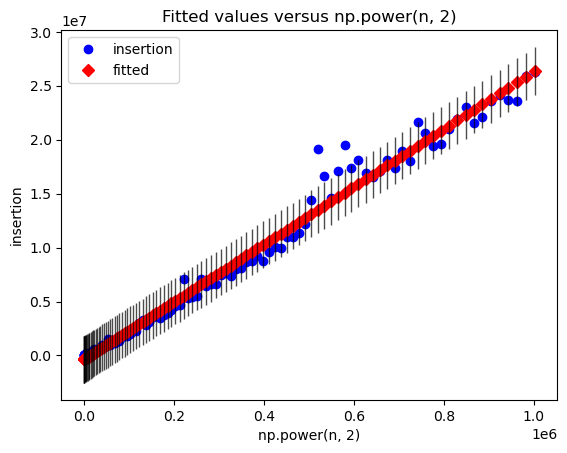

In [23]:
sm.graphics.plot_fit(res, "np.power(n, 2)")